# CS 109A/AC 209A/STAT 121A Data Science: Homework 5
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, October 26th, 2016 at 11:59pm

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Vocareum Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW4.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Verify your submission by checking your submission status on Vocareum!**

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
from scipy.stats import norm
import pandas as pd
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegressionCV as LogRegCV
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction.text import TfidfTransformer
import nltk 
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Ravi, Nikhila

### Part (b): Course Number

AC209a

### Part (c): Who did you work with?

Nicolas Hoerlne

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Image Classification

In this problem, your task is to classify images of handwritten digits. 

The data set is provided in the file `dataset_1.txt` and contains 8x8 gray-scale images of hand-written digits, flattened to a 64-length vector. The last column contains the digit. For simplicity, we have only included digits 0, 1 and 3. 

We want you to build a model that can be given the image of a hand-written digit and correctly classify this digit as 0, 1 or 3.

### Part 1(a).  Reduce the data

Images data are typically high dimensional (the image vector has one feature for every pixel). Thus, to make working with image data more tractible, one might first apply a dimension reduction technique to the data.

- Explain why PCA is a better choice for dimension reduction in this problem than step-wise variable selection.


- Choose the smallest possible number of dimensions for PCA that still permits us to perform classification. 

  (**Hint:** how do we visually verify that subgroups in a dataset are easily classifiable?)


- Visualize and interpret the principal components. Interpret, also, the corresponding PCA varaiable values.

## Load the data:

In [2]:
#Load the data
data = np.loadtxt('datasets/dataset_1.txt', delimiter=',')

#Split into predictor and response
x = data[:, :-1]
y = data[:, -1]

#Print shapes of predictor and response arrays
print 'predictor matrix shape:', x.shape
print 'response array shape:', y.shape

predictor matrix shape: (543, 64)
response array shape: (543,)


## Visualise the data:

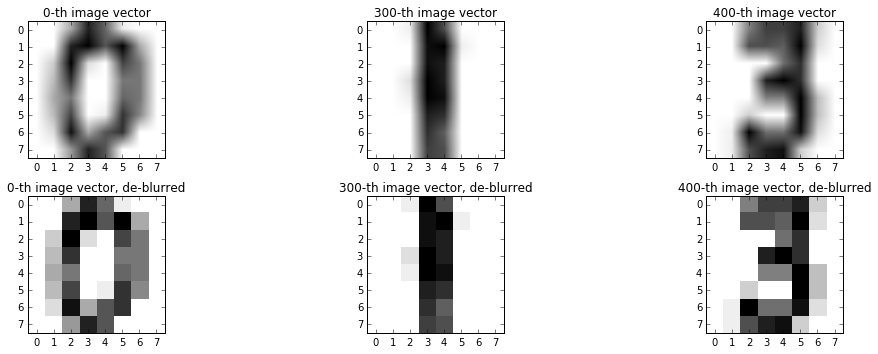

In [3]:
#Plot a couple of images from the dataset
fig, ax = plt.subplots(2, 3, figsize=(15, 5))

#Plot the 0th image vector
ax[0, 0].imshow(x[0].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 0].set_title('0-th image vector')

#Plot the 300th image vector
ax[0, 1].imshow(x[300].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 1].set_title('300-th image vector')

#Plot the 400th image vector
ax[0, 2].imshow(x[400].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 2].set_title('400-th image vector')

#Plot the 0th image vector, with de-blurring
ax[1, 0].imshow(x[0].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 0].set_title('0-th image vector, de-blurred')


#Plot the 300th image vector, with de-blurring
ax[1, 1].imshow(x[300].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 1].set_title('300-th image vector, de-blurred')


#Plot the 400th image vector, with de-blurring
ax[1, 2].imshow(x[400].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 2].set_title('400-th image vector, de-blurred')


plt.tight_layout()
plt.show()

**Explain why PCA is a better choice for dimension reduction in this problem than step-wise variable selection**

PCA finds the directions of maximum variability in the data. The features in this problem are the individual pixel values and as all pixels contribute to an image PCA is better choice for dimension reduction as the PCA components vectors are a linear combination of all the features instead of simply selecting a subset of the features. In addition, image arrays are high dimensional, and so step-wise variable selection would be computationally very inefficient (have to try very large number of combinations of the variables).  

###  Step 2: Reduce the data
Images data are typically high dimensional (the image vector has one feature for every pixel). Thus, to make working with image data more tractible, one might first apply a dimension reduction technique to the data. That is, we want to project the data onto a smaller space (think line or plane).

**Question**: How many dimensions to which should we reduce the data?

The minimum number of dimensions necessary to separate the data into distinct clusters based on their class. 

**Question**: Which subspace should we project the data onto?

Let's just experiment a bit: trial and error.

We'll try to project the data down to 2 dimensions and three dimensions. We'll randomnly select some predictors and project the data down to the plane or cube defined by these predictors.

## Project the data onto 2 dimensions:

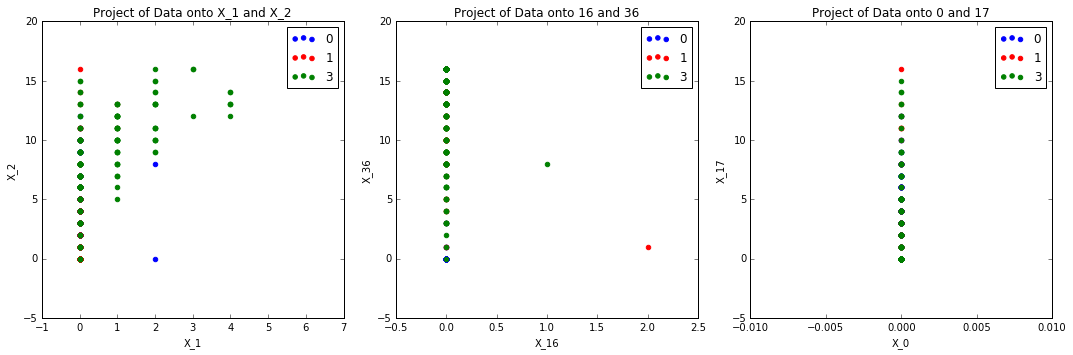

In [4]:
#Let's project the data onto some random 2D planes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

num_predictors = x.shape[1]
n_choice = xrange(num_predictors)


#Project onto axes: 1, 2
x_2d = x[:, [1, 2]]

# plot x1 vs x2 and color code the plot by the y variable value 
ax[0].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='b', label='0')
ax[0].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='r', label='1')
ax[0].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='g', label='3')

ax[0].set_xlabel('X_1')
ax[0].set_ylabel('X_2')
ax[0].set_title('Project of Data onto X_1 and X_2')
ax[0].legend()

#Project onto axes: PICK TWO RANDOM PREDICTORS

v1, v2 = np.random.choice(n_choice, 2, replace=False)
x_2d = x[:, [v1, v2]]

ax[1].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='b', label='0')
ax[1].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='r', label='1')
ax[1].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='g', label='3')

ax[1].set_xlabel('X_'+ str(v1))
ax[1].set_ylabel('X_' + str(v2))
ax[1].set_title('Project of Data onto ' + str(v1) + ' and ' + str(v2))
ax[1].legend()

#Project onto axes: PICK TWO RANDOM PREDICTORS
v1, v2 = np.random.choice(n_choice, 2, replace=False)
x_2d = x[:, [v1, v2]]

ax[2].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='b', label='0')
ax[2].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='r', label='1')
ax[2].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='g', label='3')

ax[2].set_xlabel('X_'+ str(v1))
ax[2].set_ylabel('X_' + str(v2))
ax[2].set_title('Project of Data onto ' + str(v1) + ' and ' + str(v2))
ax[2].legend()

plt.tight_layout()
plt.show()

These plots show that when the data is projected onto these axis there is no clear separation between classes - all the the colours are mixed together. 

## Project the data onto 3 dimensions:

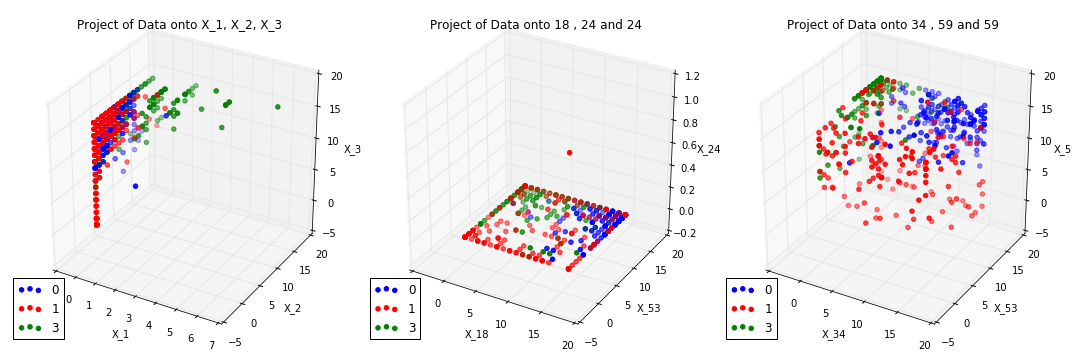

In [5]:
#Let's project the data onto some random 3D planes
fig = plt.figure(figsize=(15, 5))

#Project onto axes: 1, 2, 3
x_2d = x[:, [1, 2, 3]]

ax1 = fig.add_subplot(1, 3, 1,  projection='3d')

ax1.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], c='b', color='b', label='0')
ax1.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], c='r', color='r', label='1')
ax1.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], c='g', color='g', label='3')

ax1.set_xlabel('X_1')
ax1.set_ylabel('X_2')
ax1.set_zlabel('X_3')
ax1.set_title('Project of Data onto X_1, X_2, X_3')
ax1.legend(loc='lower left')

#Project onto axes: PICK THREE RANDOM PREDICTORS
v1, v2, v3 = np.random.choice(n_choice, 3, replace=False)
x_2d = x[:, [v1, v2, v3]]

ax2 = fig.add_subplot(1, 3, 2,  projection='3d')

ax2.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], c='b', color='b', label='0')
ax2.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], c='r', color='r', label='1')
ax2.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], c='g', color='g', label='3')

ax2.set_xlabel('X_'+ str(v1))
ax2.set_ylabel('X_'+ str(v2))
ax2.set_zlabel('X_'+ str(v3))
ax2.set_title('Project of Data onto ' + str(v1) + ' , ' + str(v3) + ' and ' + str(v3))
ax2.legend(loc='lower left')

#Project onto axes: PICK THREE RANDOM PREDICTORS
v1, v2, v3 = np.random.choice(n_choice, 3, replace=False)
x_2d = x[:, [v1, v2, v3]]

ax3 = fig.add_subplot(1, 3, 3,  projection='3d')

ax3.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], c='b', color='b', label='0')
ax3.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], c='r', color='r', label='1')
ax3.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], c='g', color='g', label='3')

ax3.set_xlabel('X_'+ str(v1))
ax3.set_ylabel('X_'+ str(v2))
ax3.set_zlabel('X_'+ str(v3))
ax3.set_title('Project of Data onto ' + str(v1) + ' , ' + str(v3) + ' and ' + str(v3))
ax3.legend(loc='lower left')

plt.tight_layout()
plt.show()

This also shows that the classes are not clearly separated when data is projected onto a random subset of the features. No separation means no good decision surface, which results in poor classification. 

** PCA for dimensionality reduction **

PCA is a valid technique for high dimensional input data, that is known to be highly correlated. PCA is appropriate in the context of this task as in these image data, the dimensionality is high (64 features due to 64 pixels in the image) and adjacent pixel values are known to be highly correlated. 

PCA is used to extract one or more linear combinations of the features (principal components) to achieve "decorrelation" and dimensionality reduction. The top n components of PCA represents the best fitting n dimensional plane for the data.

## Apply PCA:

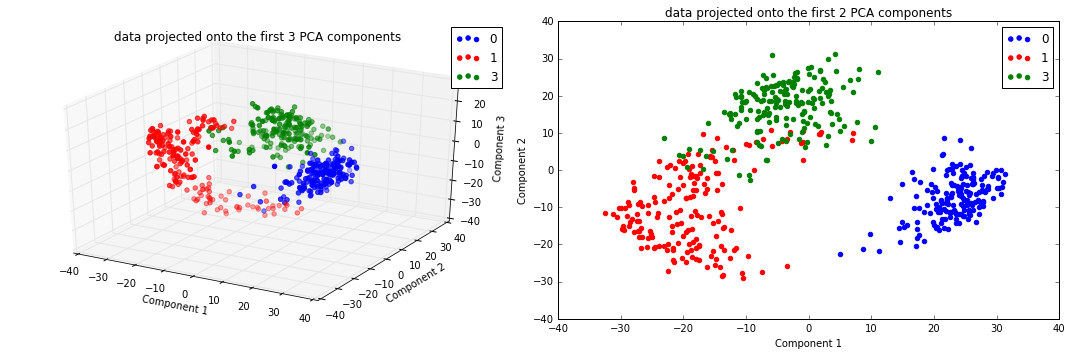

In [6]:
#Apply PCA to data and get the top 3 axes of maximum variation
pca = PCA(n_components=3)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Visualized our reduced data
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1,  projection='3d')
ax1.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], x_reduced[y==0, 2], c='b', color='b', label='0')
ax1.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], x_reduced[y==1, 2], c='r', color='r', label='1')
ax1.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], x_reduced[y==3, 2], c='g', color='g', label='3')

ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_zlabel('Component 3')
ax1.set_title('data projected onto the first 3 PCA components')
ax1.legend()

#Apply PCA to data and get the top 2 axes of maximum variation
pca = PCA(n_components=2)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Visualized our reduced data
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], c='b', color='b', label='0')
ax2.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], c='r', color='r', label='1')
ax2.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], c='g', color='g', label='3')

ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_title('data projected onto the first 2 PCA components')
ax2.legend()

plt.tight_layout()
plt.show()

**Are the PCA dimension reductions any good? What does a "good" dimension reduction mean in the context of our task?
Can you interpret the components of the PCA in the context of our application? What is a component of the PCA (in terms of predictors) again?**

By contruction, the first 2 or 3 components of PCA captures the top 2 or 3 directions of maximum variation. Good dimension reduction means that the classes are clearly separated. In this case, the top 2 and 3 components also capture the separation between the classes. Clear separation is already achieved using 2 components of the PCA which means that two linear combinations of predictors is sufficient for classification. 

**Does the directions of maximum variation always correspond to maximum separation of the classes? That is, is projecting our data onto the top components of the PCA always a good idea for classification?**

The direction of maximum variation may not always correspond to the maximum separataion of classes. But it is a good option to explore

The components of PCA are linear combinations of the original predictors which were pixel values.  Therefore each PCA component should be an image and can be visualised. 

## Visualise the PCA Components:

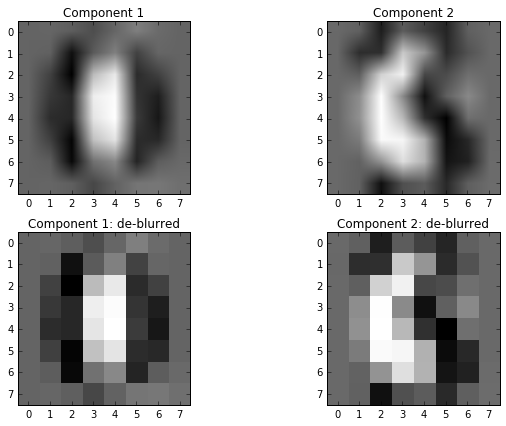

In [7]:
#Display and interpret the principal components of PCA

#Display the principal components of PCA as digital images
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
# COMPONENT 1
ax[0, 0].imshow(pca.components_[0].reshape(8,8), cmap=plt.cm.gray_r)
ax[0, 0].set_title('Component 1')

# COMPONENT 2
ax[0, 1].imshow(pca.components_[1].reshape(8,8), cmap=plt.cm.gray_r)
ax[0, 1].set_title('Component 2')

# COMPONENT 1
ax[1, 0].imshow(pca.components_[0].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 0].set_title('Component 1: de-blurred')

# COMPONENT 2
ax[1, 1].imshow(pca.components_[1].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 1].set_title('Component 2: de-blurred')

plt.tight_layout()
plt.show()

The first component looks like the digit 0 and the second resembles the digit 3. The data projected onto these components can be interpreted as follows:
- Nearly all the data points corresponding to the digit 1 is expressed as a negative combination of the two components - so 1 is not 3 and not 0 
- nearly all the data points corresponding to 3 are expressed as a combination of a negative multiple of component 1 and a positive multiple of component 2 - so 3 is 3 and not 0
- nearly all the data points corresponding to 0 are expressed as a combination of a positive multiple of component 1 and a negative multiple of component 2 - so 0 is 0 and not 3

### Part 1(b). Build a classifier

So far, we have only learned models that distinguishes between two classes. Develop and implement a **simple and naive** method of distinguishing between the three digits in our reduced dataset using binary classifiers. 

## Build three separate classifiers:

In [8]:
###Build a classifier to distinguish between 0 and 1

#Remove all instances of class 3
x_binary = x_reduced[y != 3, :]

#Remove all instances of class 3
y_binary = y[y != 3]

#Fit logistic regression model for 0 vs 1
logistic_01 = LogReg()
logistic_01.fit(x_binary, y_binary)

###Build a classifier to distinguish between 1 and 3

#Remove all instances of class 0
x_binary = x_reduced[y != 0, :]

#Remove all instances of class 0
y_binary = y[y != 0]

#Fit logistic regression model for 1 vs 3
logistic_13 = LogReg()
logistic_13.fit(x_binary, y_binary)

###Build a classifier to distinguish between 0 and 3

#Remove all instances of class 1
x_binary = x_reduced[y != 1, :]

#Remove all instances of class 1
y_binary = y[y != 1]

#Fit logistic regression model for 0 vs 3
logistic_03 = LogReg()
logistic_03.fit(x_binary, y_binary)

#Predict a label for our dataset using each binary classifier
y_pred_01 = logistic_01.predict(x_reduced)
y_pred_13 = logistic_13.predict(x_reduced)
y_pred_03 = logistic_03.predict(x_reduced)

#Now, for each image, we have THREE predictions!
#To make a final decision for each image, we just take a majority vote.
n = x_reduced.shape[0]
y_votes = np.zeros((n, 3))

#Votes for 0
y_votes[y_pred_01 == 0, 0] += 1
y_votes[y_pred_03 == 0, 0] += 1

#Votes for 1
y_votes[y_pred_01 == 1, 1] += 1
y_votes[y_pred_13 == 1, 1] += 1

#Votes for 3
y_votes[y_pred_03 == 3, 2] += 1
y_votes[y_pred_13 == 3, 2] += 1

#For each image, label it with the class that get the most votes
y_pred = y_votes.argmax(axis = 1)

#Relabel class 2 as class 3
y_pred[y_pred == 2] = 3

#Accuracy of our predictions
print 'Accuracy of combined model:', np.mean(y == y_pred)

Accuracy of combined model: 0.935543278085


### Part 1(c). Build a better one
Asses the quality of your classifier.


- What is the fit (in terms of accuracy or R^2) of your model on the reduced dataset? Visually assess the quality of your classifier by plotting decision surfaces along with the data. Why is visualization of the decision surfaces useful? What does this visualization tell you that a numberical score (like accuracy or R^2) cannot?


- What are the draw backs of your approach to multi-class classification? What aspects of your method is contributing to these draw backs, i.e. why does it fail when it does? 

  (**Hint:** make use your analysis in the above; think about what happens when we have to classify 10 classes, 100 classes)
 
 
- Describe a possibly better alternative for fitting a multi-class model. Specifically address why you expect the alternative model to outperform your model.

  (**Hint:** How does ``sklearn``'s Logistic regression module handle multiclass classification?).

## Evaluate the model:

The accuracy of the combined model is 0.935543278085. However high accuracy may not be indicative of a good model. The quality of the classifier can be evaluated by visually checking the "goodness" of our classifier. i.e. plot the data and visualize the decision boundaries (the lines on which logistic regression rely to separate one class from another).

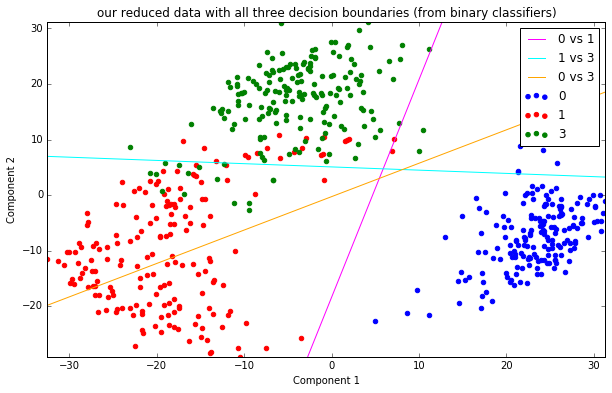

In [9]:
#--------  fit_and_plot_model
# A function to fit a binary LogReg model and visualize it
# Input: 
#      model (LogReg model)
#      ax (axes object for plotting)
#      legend_label (legend label for the plot)

def plot_model(model, ax, legend_label, color):
    #Get the coefficients from logistic regression model
    coef = model.coef_[0]
    intercept = model.intercept_
    
    #Find the max and min horizontal values of our data
    x_0 = np.min(x_reduced[:, 0])
    x_1 = np.max(x_reduced[:, 0])
        
    #Plug int the max and min horizontal values of our data into the equation
    #of the line defined by the coefficients
    y_0 = (-intercept - coef[0] * x_0) / coef[1]
    y_1 = (-intercept - coef[0] * x_1) / coef[1]

    #Plot a line through the pair of points we found above
    ax.plot([x_0, x_1], [y_0, y_1], label=legend_label, color=color)


fig, ax = plt.subplots(1, 1, figsize=(10, 6))

#Scatter plot of our data
ax.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], color='b', label='0')
ax.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], color='r', label='1')
ax.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], color='g', label='3')

#Plot decision boundaries for 0 vs 1
plot_model(logistic_01, ax, '0 vs 1', 'magenta')
#Plot decision boundaries for 1 vs 3
plot_model(logistic_13, ax, '1 vs 3', 'cyan')
#Plot decision boundaries for 0 vs 3
plot_model(logistic_03, ax, '0 vs 3', 'orange')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_xlim([np.min(x_reduced[:,0]), np.max(x_reduced[:,0])])
ax.set_ylim([np.min(x_reduced[:,1]), np.max(x_reduced[:,1])])
ax.set_title('our reduced data with all three decision boundaries (from binary classifiers)')
ax.legend()
plt.show()

**What are the draw backs of your approach to multi-class classification? What aspects of your method is contributing to these draw backs, i.e. why does it fail when it does?**
  
In the case of a large number of classes, the decision boundaries will become increasingly closer together and there will be increasing overlap between clusters of classes. This makes it harder to discriminate between classes. In addition the number of decision boundaries required will increase rapidly as the number of classes increases. To distinguish between 0 and 3, only one boundary is required, but to distinguish between 0 and 1 or 0 and 3, two boundaries are necessary. As the number of classes increases, the number of binary classfiers needed also increases. e.g if there are 100 classes, need 100 choose 2 classifiers. 

**Describe a possibly better alternative for fitting a multi-class model. Specifically address why you expect the alternative model to outperform your model**

In addition to the problem of smaller separation between clusters, in multi class models, the decision boundaries may not be linear. Non-linear decision functions may need to be used which are better able to discriminate between many clusters which are close to each other. Another method is to use the cross- entropy loss function which is fit across the entire probability distribution instead of fitting separate binary classifiers to each model. In this case, a multinomial logistic regression model is used to estimate a membership probability for each class, and predict the class with the highest assigned probability. 
 

## Problem 2. Sentiment Analysis

In this problem, you will explore how to predict the underlying emotional tone of textual data - this task is called sentiment analysis. 

You will be using the dataset in the file `dataset_2.txt`. In this dataset, there are 1382 posts containing textual opinions about Ford automobiles, along with labels indicating whether the opinion expressed is positive or negative. 

Given a new post about an automobile, your goal is to predict if the sentiment expressed in the new post is positive or negative. For this task you should implement a *regularized* logistic regression model.

Produce a report summarizing your solution to this problem:

- Your report should address all decisions you made in the "Data Science Process" (from Lectures #0, #1, #2):

   a. Data collection & cleaning
   
   b. Data exploration
   
   c. Modeling
   
   d. Analysis  
   
   e. Visualization and presentation  


- Your report should be informative and accessible to a **general audience with no assumed formal training in mathematics, statistics or computer science**.


- The exposition in your report, not including code, visualization and output, should be at least three paragraphs in length (you are free to write more, but you're not required to).

Structure your presentation and exposition like a professional product that can be submitted to a client and or your supervisor at work.

# Report


## 1. Data collection & cleaning

In [12]:
#Load the data
raw_df = pd.read_csv('datasets/dataset_2.txt', delimiter=',')

#Encode the categorical variable using one-hot encoding
df = pd.DataFrame({})
for column in raw_df.columns:
    if column == 'class':
        encoded_col = pd.get_dummies(raw_df['class'])
        df = pd.concat([df, encoded_col], axis=1) 
    else:
        df = pd.concat([df, raw_df[column]], axis=1) 
df.head(10)

,Neg,Pos,text
0,1.0,0.0,In 1992 we bought a new Taurus and we really ...
1,1.0,0.0,The last business trip I drove to San Franci...
2,1.0,0.0,My husband and I purchased a 1990 Ford F250 a...
3,1.0,0.0,I feel I have a thorough opinion of this truc...
4,1.0,0.0,AS a mother of 3 all of whom are still in ca...
5,1.0,0.0,The Ford Winstar is a car that I would not re...
6,1.0,0.0,We bought this van in 1999 after having been...
7,1.0,0.0,I bought the Focus wagon for it s cargo space...
8,1.0,0.0,You ve probably heard about the giant 2000 Fo...
9,1.0,0.0,If you thought that the GMC Chevrolet Suburba...


#### Determine the counts of each word in each review:

In [20]:
# remove stop words
stop_words = nltk.corpus.stopwords.words('english').append(['and', 'or', 'before', 'a', 'an', 'the', 'br', 'for', 'am', 'then'])
# the corpus is composed of all the articles in the dataset. 
corpus = df['text'].values

vectorizer_none = CountVectorizer()
total_words = len(vectorizer_none.fit(corpus).get_feature_names())

print 'Total number of unique words in the corpus: ', total_words

vectorizer = CountVectorizer(stop_words='english', min_df=4, max_df=0.8)

# create a feature vector for each article 
vector_transform = vectorizer.fit(corpus)
x = vectorizer.transform(corpus)

# implement term frequency inverse document frequencey scaling 
tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(x)

x = x_tfidf.toarray()
y = df['Pos'].values

print 'Shape of transformed article data: ', x.shape
print 'Number of features: ',  len(vectorizer.get_feature_names())

Total number of unique words in the corpus:  16730
Shape of transformed article data:  (1382, 5645)
Number of features:  5645


In [21]:
vectorizer.get_feature_names()[-70:-50]

[u'worker',
 u'workers',
 u'working',
 u'workmanship',
 u'works',
 u'world',
 u'worlds',
 u'worn',
 u'worried',
 u'worries',
 u'worry',
 u'worrying',
 u'worse',
 u'worst',
 u'worth',
 u'worthless',
 u'worthwhile',
 u'worthy',
 u'wouldn',
 u'wouldnt']

## 2.  Modelling

5 fold cross validation wil be used to find the best model based on the training set. The model will be used to make predictions on the test set and the results will be scored.

In [16]:
# split into 70% train, 30% test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [17]:
logitm_l1_cv = LogRegCV(Cs = 100, cv=5, penalty = "l2")
logitm_l1_cv.fit(x_train, y_train)

LogisticRegressionCV(Cs=100, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

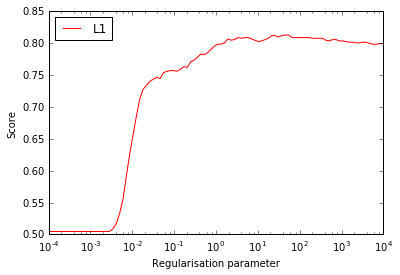

In [18]:
cv_scores = logitm_l1_cv.scores_[1.0]
mean_score = np.mean(cv_scores, axis=0)
plt.semilogx(logitm_l1_cv.Cs_, mean_score, color='red', label='L1')
plt.legend(loc='best')
plt.xlabel('Regularisation parameter')
plt.ylabel('Score')

It can be seen that for very small values of the regularisaiton parameter with L2 regularisation, there is a high penalty and the model is effectly just a random classifier so each class is selected half of the time. With large regularisation parameter, there is low penalty so the score is high, but this could be due to overfitting. 

In [19]:
#Find the best value of the regularisation parameter. 
print 'best C', logitm_l1_cv.C_[0],  'Max score ', max(mean_score)
logitm_model = LogReg(C = logitm_l1_cv.C_[0], penalty = "l2")
logitm_model.fit (x_train, y_train)

best C 45.3487850813 Max score  0.812844755444


LogisticRegression(C=45.348785081285911, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## 3. Analysis:

In [27]:
sorted_coeff_indices = np.argsort(logitm_model.coef_)[0]
x_features = np.array(vectorizer.get_feature_names())
negative_words = x_features[sorted_coeff_indices[0:20]]
# The coefficients with the smallest indices will correspond to the words associated with the negative sentiment
print 'Negative words \n', [word for word in negative_words]

Negative words 
[u'toyota', u'months', u'recalls', u'worst', u'poor', u'fixed', u'ok', u'transmission', u'times', u'3rd', u'broke', u'started', u'bumper', u'repair', u'low', u'hate', u'awful', u'terrible', u'cost', u'soft']


In [28]:
# The coefficients with the largest indices will correspond to the words associated with the postive sentiment
positive_words = x_features[sorted_coeff_indices[-20:]]
print 'Postive words \n', [word for word in positive_words]

Postive words 
[u'owned', u'lights', u'easily', u'equipped', u'love', u'college', u'perfect', u'cargo', u'oil', u'svt', u'recently', u'escort', u'trips', u'snow', u'looking', u've', u'highly', u'wife', u'drive', u'great']


In [37]:
y_pred = logitm_model.predict(x_test)
false_positive_indices = [i for i, x in enumerate(y_test) if ((y_pred[i] == 1) and (y_test[i] == 0))]
false_negative_indices = [i for i, x in enumerate(y_test) if ((y_pred[i] == 0) and (y_test[i] == 1))]

print 'Accuracy of the model', logitm_model.score(x_test, y_test)
print 'Number of false positives', len(false_positive_indices)
print 'Number of false negatives', len(false_negative_indices)

Accuracy of the model 0.787951807229
Number of false positives 45
Number of false negatives 43


In [31]:
# multiply model coeffs by the word vector to get the top words contributing to the model 
x1 = x_test[false_positive_indices[1]]
params = logitm_model.coef_
vals = params * x1
sorted_vals = np.argsort(vals)[0]
print 'Top Negative words in the false positive article: \n', x_features[sorted_vals[:15]]
print '\n Negative words from top list: \n', [x for x in x_features[sorted_vals[:15]] if x in negative_words]
print '\n Top Negative words in the false positive article: \n ', x_features[sorted_vals[-15:]]
print '\n Postive words from top list: \n', [x for x in x_features[sorted_vals[-15:]] if x in positive_words]

Top Negative words in the false positive article: 
[u'broke' u'll' u'poor' u'just' u'let' u'disappointment' u'time' u'times'
 u'board' u'saying' u'dashboard' u'poorly' u'quality' u'seating' u'money']

 Negative words from top list: 
[u'broke', u'poor', u'times']

 Top Negative words in the false positive article: 
  [u'considering' u'drive' u'live' u'changer' u'expedition' u'lights'
 u'luxury' u'roads' u'awesome' u'powerful' u'truck' u'ride' u'wife'
 u'highly' u'driving']

 Postive words from top list: 
[u'drive', u'lights', u'wife', u'highly']


## 4. Visualisation:

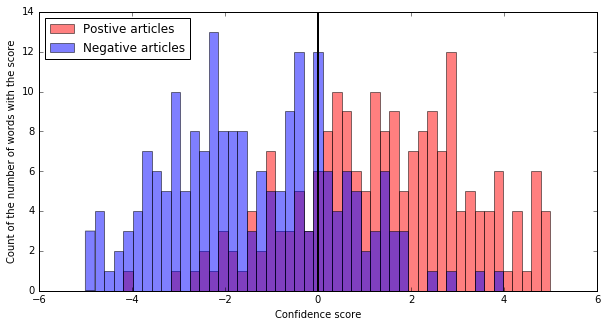

In [32]:
# confidence scores for articles which are known to be positive
y_test_pos_prob = logitm_model.decision_function(x_test[y_test==1,:])

# confidence scores for articles which are known to be negative
y_test_neg_prob = logitm_model.decision_function(x_test[y_test==0, :])

(mu_pos, sigma_pos) = norm.fit(y_test_pos_prob)
(mu_neg, sigma_neg) = norm.fit(y_test_neg_prob)

bins = np.linspace(-5, 5, 50)
plt.figure(figsize=(10,5))

plt.hist(y_test_pos_prob, bins, alpha=0.5,  color='red', label='Postive articles')
plt.hist(y_test_neg_prob, bins, alpha=0.5, color='blue', label='Negative articles')
plt.axvline(x=0, linewidth=2, color='black')

# # add a 'best fit' line
# y_pos = mlab.normpdf( bins, mu_pos, sigma_pos)
# l_pos = plt.plot(bins, y_pos, 'r--', linewidth=2)

# y_neg = mlab.normpdf( bins, mu_neg, sigma_neg)
# l_neg = plt.plot(bins, y_neg, 'b--', linewidth=2)

plt.xlabel('Confidence score')
plt.ylabel('Count of the number of words with the score')
plt.legend(loc='best')
plt.show()

## Introduction 

The aim of this task was to build a predict the underlying emotional tone of textual data, specifically given a new post about an automobile predict if the sentiment expressed is positive or negative. 


## Data Cleaning 

The data was imported and explored by examining the total number of unique words in the corpus (entire set of reviews) and the counts of each word. Each article was processed and transformed into a list containing the counts for each of these unique words. This list is referred to as a feature vector. The length of the feature vector will be equal to the number of unique words in the corpus. This gives us a way of characterising the words present in each review. 

There are several parameters which can be varied in the couting process to determine the words which are used in the corpus. I have chosen to remove stopwords such as 'the', 'a' etc as they are are non-sentiment expressing terms (do no contribute to the positivity/negativity of an article) and also remove words which occur fewer that 4 times across the entire set of reviews. 

The processing of the data showed that there are 16730 unique words in the corpus, but after removing stopwords and infrequently occuring words, this number reduced to 5932 words. There are therefore 5932 elements in the feature vector associated with each review. 

## Modelling 

The transformed article data was used to fit a statistical model called a logistic regression model. The resulting statistical model can be used to predict the sentiment of an article given it's feature vector i.e the counts of each of the words. As the data has high dimensionality (i.e. a large number of words in the feature vector),a technique called regularisation can be used. This technique prevents a problem known as overfitting, where the model is fit too closely to the available data and does not generate useful predictions for new articles.

The data was split into two sets - test and train. The training set was used to determine the model and the test set was used to score the model and determine its accuracy. 

Statistical techniques such as cross validation were used to determine the best model based on the training data. This is used in order to test out different values of the parameters of the model to make sure the best model is chosen i.e. the model that has the highest percentage accuracy in predicting the correct sentiment. It is important to ensure that there are articles of both types of polarity present in training set so the model is able to understand which words are associated with each sentiment and is not biased towards one sentiment. 


## Analysis

After the model parameters had been determined, it was fit to the entire data set and used to make predictions on the testing set. The accuracy of the model is seen to be 78% i.e. 78% of the time the model predicts the correct sentiment based on the text in the review. In the set of erroneous predictions there are more false postive results than false negatives indicating that the model may be slightly biased towards making postive predictions.

The model can be interpreted by looking at the coefficients (parameters). There is one coefficient per word in the feature vector. The model gives a high score to words which contribute to making a review positive, and give a low score to words which are associated with making a review negative. 

The top 15 negative words and top 15 positive words from the model were extracted. From the negative words it can be seen that words like 'repair', 'worst', 'cost', 'poor', 'awful', 'hate' all are indicative of a negative review, which intuitively makes sense.  Conversley the postive words list contains words like 'great', 'love', 'like', 'perfect',  which are indicative of a good review. 

The accuracy of the model can be estimated by determining the percentage of correct predictions made on the test set i.e. the number of reviews for which the predicted sentiment matches the actual sentiment. In addition, the number of false postives (model predicts postive, but actually negative) and false negatives (model predicts negative but actually postive) can be investigated. 

The occurence of errors in the predictions can be investigated by looking at the words in the review which are scored highly by the model (in technical terms the values of the feature vector after it has been multiplied by the coefficients of the fitted model). This will give the list of words in the review which contribute to its 'negativeness' and 'postiveness' and can be compared to the top positive and negative words in the entire set (as determined previously from examining the model coefficients). 

From examining an negative review which was incorrectly classified as positive, it can be seen that overall, the review had more postive words which were also part of the list of top postive words in the corpus, compared to the equivalent number of negative words. This has lead to the article being incorrectly classified as positive. 

The confidence score for each article can be calculated and plotted as a histogram. If the confidence score is greater than 0 it means that the postive class would be predicted. The histogram of the confidence scores shows that many positively tagged reviews (in pink) actually have a confidence score less than 0 indicating that they have been incorrectly classified by the model as being negative and vice versa for negative revies. This also explains the incorrect classifications observed.

## Review and Conclusions

Overall, the moddel has been shown to predict the sentiment of a review with 78% accuracy. The model could be further improved by preprocessing the text to removing further non-sentiment expressing terms before fitting a model or removing words which occur with very high frequency. This could help to reduce the number of words in the feature vector and enable more accurate predictions of sentiment. 

## Challenge Problem: Automated Medical Diagnosis

In this problem, you are going to build a model to diagnose heart disease. 

The training set is provided in the file ``dataset_3_train.txt`` and there are two test sets: ``dataset_3_test_1.txt`` and ``dataset_3_test_2.txt``. Each patient in the datasets is described by 5 biomarkers extracted from cardiac SPECT images; the last column in each dataset contains the disease diagnosis (1 indicates that the patient is normal, and 0 indicates that the patient suffers from heart disease).

- Fit a logistic regression model to the training set, and report its accuracy on both the test sets. 


- Is your accuracy rate meaningful or reliable? How comfortable would you be in using your predictions to diagnose real living patients? Justify your answers. 

  (**Hint:** How does the performance of your model compare with a classifier that lumps all patients into the same class?)


- Let's call the logistic regression model you learned, ${C}_1$. Your colleague suggests that you can get higher accuracies for this task by using a threshold of 0.05 on the Logistic regression model to predict labels instead of the usual threshold of 0.5, i.e. use a classifier that predicts 1 when $\widehat{P}(Y = 1\,|\, X) \geq 0.05$ and 0 otherwise. Let's call this classifier ${C}_2$. Does ${C}_2$ perform better the two test sets - that is, which one would you rather use for automated diagnostics? Support your conclusion with careful analysis. 


- Generalize your analysis of these two classifiers. Under what general conditions does $C_2$ perform better than ${C}_1$? Support your conclusion with a mathematical proof or simulation


**Hint:** You were told in class that a classifier that predicts 1 when $\widehat{P}(Y = 1 \,|\, X) \geq 0.5$, and 0 otherwise, is the Bayes classifier. This classifier minimizes the classification error rate. What can you say about a classifier that uses a threshold other than $0.5$? Is it the Bayes classifier for a different loss function?


**Hint:** For the first three parts, you might find it useful to analyze the conditional accuracy on each class.

## Load the data:

In [34]:
df_bio = pd.read_csv('datasets/dataset_3_train.txt', header=0, index_col=False, names=['1', '2', '3', '4', '5', 'y'], delimiter=',')
df_test_1 = pd.read_csv('datasets/dataset_3_test_1.txt', header=0, names=['1', '2', '3', '4', '5', 'y'], delimiter=',')
df_test_2 = pd.read_csv('datasets/dataset_3_test_2.txt', header=0, names=['1', '2', '3', '4', '5', 'y'], delimiter=',')
df_bio.head()

,1,2,3,4,5,y
0,73.0,73.0,75.0,79.0,64.0,0.0
1,62.0,56.0,66.0,57.0,74.0,0.0
2,40.0,73.0,61.0,74.0,61.0,0.0
3,68.0,58.0,76.0,71.0,64.0,0.0
4,70.0,54.0,66.0,66.0,76.0,0.0


In [35]:
print 'Total number of patients with heart disease: ', len(df_bio[df_bio['y'] == 0])
print 'Total number of patients without heart disease: ', len(df_bio[df_bio['y'] == 1])

Total number of patients with heart disease:  147
Total number of patients without heart disease:  8


The majority of the patients in the data set have heart disease and there are only 8 patients without heart disease. 

In [39]:
x_bio = df_bio[['1', '2', '3', '4', '5']]
y_bio = df_bio['y']

## Split the data into testing and training sets:

In [40]:
x_bio_train, x_bio_test, y_bio_train, y_bio_test = train_test_split(x_bio, y_bio, train_size=0.7, random_state=42)

In [42]:
print 'Number of patients in the training set: ', x_bio_train.shape[0]
print 'Number of patients with heart disease: ', len(y_bio_train[y_bio_train==0])
print 'Number of patients without heart disease: ', len(y_bio_train[y_bio_train==1])

print '\nNumber of patients in the testing set: ', x_bio_test.shape[0]
print 'Number of patients with heart disease: ', len(y_bio_test[y_bio_test==0])
print 'Number of patients without heart disease: ', len(y_bio_test[y_bio_test==1])

Number of patients in the training set:  108
Number of patients with heart disease:  102
Number of patients without heart disease:  6

Number of patients in the testing set:  47
Number of patients with heart disease:  45
Number of patients without heart disease:  2


Nearly of the patients in the training set set have heart disease and there are only 6 patients without heart disease. This suggests that the classifier may be biased towards patients with heart disease as there is not an equal split in the number of patients from each class in the training data. 

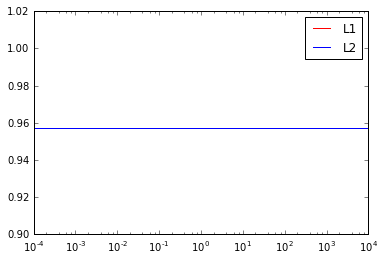

In [43]:
Cs = []
score_l1 = []
score_l2 = []

for c in np.linspace(-4, 4, 100):
    C = 1/float(10**c)
    logitm_l1 = LogReg(C = C, penalty = "l1")
    logitm_l1.fit (x_bio_train, y_bio_train)
    logitm_l2 = LogReg(C = C, penalty = "l2")
    logitm_l2.fit (x_bio_train, y_bio_train)
    Cs.append(C)
    s_1 = logitm_l1.score(x_bio_test, y_bio_test)
    s_2 = logitm_l2.score(x_bio_test, y_bio_test)
    score_l1.append(s_1)
    score_l2.append(s_2)

plt.figure()
plt.semilogx(Cs, score_l1, color='red', label='L1')
plt.semilogx(Cs, score_l2, color='blue', label='L2')
plt.legend()
plt.show()

The output of the models shows that classifier is nearly always correct. The classifier was trained with a dataset which consisted mostly of patients with heart disease therefore for the patients in the test set, it will nearly always predict that they have the disease. As there are very few patients in the testing set without heart disease (only 2 patients), overall, the classifier still remains accurate. 

This classifier will not generalise well to other testing sets as it was not trained on data set which had equal representation of the two groups.

## Test the classifier on the testing sets:

In [79]:
x_test_1 = df_test_1[['1', '2', '3', '4', '5']]
y_test_1 = df_test_1['y']
x_test_2 = df_test_2[['1', '2', '3', '4', '5']]
y_test_2 = df_test_2['y']

print 'Number of patients in test set 1: ', x_test_1.shape[0]
print 'Number of patients with heart disease: ', len(y_test_1[y_test_1==0])
print 'Number of patients without heart disease: ', len(y_test_1[y_test_1==1])

print '\nNumber of patients in test set 2: ', x_test_2.shape[0]
print 'Number of patients with heart disease: ', len(y_test_2[y_test_2==0])
print 'Number of patients without heart disease: ', len(y_test_2[y_test_2==1])

Number of patients in test set 1:  66
Number of patients with heart disease:  62
Number of patients without heart disease:  4

Number of patients in test set 2:  93
Number of patients with heart disease:  46
Number of patients without heart disease:  47


In [86]:
# choose regular logistic regression instead of regularised as the regularisation parameter does not have 
# any effect of the score and also the number of predictors is small. 
logitm_l2_bio = LogReg()
logitm_l2_bio.fit(x_bio_train, y_bio_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
score_test_1 = logitm_l2_bio.score(x_test_1, y_test_1)
score_test_2 = logitm_l2_bio.score(x_test_2, y_test_2)

print 'TEST SET 1\n'
print 'Accuracy', score_test_1
print 'Accuracy for class 0', logitm_l2_bio.score(x_test_1[y_test_1==0], y_test_1[y_test_1==0])
print 'Accuracy for class 1', logitm_l2_bio.score(x_test_1[y_test_1==1], y_test_1[y_test_1==1])
print '\nFalse positives', len([i for i, x in enumerate(y_test_1) if ((y_pred_1[i] == 0) and (y_test_1[i] == 1))])
print 'False negatives', len([i for i, x in enumerate(y_test_1) if ((y_pred_1[i] == 1) and (y_test_1[i] == 0))])

print '\nTEST SET 2\n'
print 'Accuracy', score_test_2
print 'Accuracy for class 0', logitm_l2_bio.score(x_test_2[y_test_2==0], y_test_2[y_test_2==0])
print 'Accuracy for class 1', logitm_l2_bio.score(x_test_2[y_test_2==1], y_test_2[y_test_2==1])
print '\nFalse positives', len([i for i, x in enumerate(y_test_2) if ((y_pred_2[i] == 0) and (y_test_2[i] == 1))])
print 'False negatives', len([i for i, x in enumerate(y_test_2) if ((y_pred_2[i] == 1) and (y_test_2[i] == 0))])

y_pred_2 = logitm_l2_bio.predict(x_test_2)
y_pred_1 = logitm_l2_bio.predict(x_test_1)

TEST SET 1

Accuracy 0.939393939394
Accuracy for class 0 1.0
Accuracy for class 1 0.0

False positives 4
False negatives 0

TEST SET 2

Accuracy 0.494623655914
Accuracy for class 0 1.0
Accuracy for class 1 0.0

False positives 47
False negatives 0


**Is your accuracy rate meaningful or reliable? How comfortable would you be in using your predictions to diagnose real living patients? Justify your answers.**
 
The score of applying the model to test set 1 is high, whereas the score for test set 2 is low. 

The distribution of patients in the test set 1 is similar to the training set - there are very few patients without heart disease (class 1). This explains why the score of applying the model to this set is high - the model will predict that the patient has the disease (class 0) and for most of the patients in this set, the prediction will be correct. However the few class 1 patients will be incorrectly classified. This is shown by looking at the accuracy of predicting each class - for class 0 the accuracy is 1 whereas accuracy for class 0 is 0. 

However test set 2 has an approximately even split between patients with the disease and without the disease. The score of applying the model to this set is very low (0.5). The model will predict that all patients have the disease and 50% of the time it will be correct. This is again shown by looking at the accuracy of predicting each class - for class 0 the accuracy is 1 whereas accuracy for class 0 is 0. This is no better than a binary classifier that lumps all the patients into one class and so has a 50% chance of being accurate. 

Therefore the accuracy rate is neither meaningful nor reliable as it depends on the composition of the dataset used for both testing and training. 

## Classifier with threshold probability of 0.05:

In [142]:
def evaluate_test_set(x_test_1, y_test_1):
    prob = 0.05
    y_test_1_prob = logitm_l2_bio.predict_proba(x_test_1)[:, 1]
    y_pred = np.zeros((len(y_test_1), 1)).reshape(-1)
    y_pred[y_test_1_prob > prob] = 1
    false_negatives = [i for i,x in enumerate(y_pred) if (y_pred[i] == 1 and y_test_1[i] == 0)]
    false_positives = [i for i,x in enumerate(y_pred) if (y_pred[i] == 0 and y_test_1[i] == 1)]
    print 'Accuracy', np.mean(y_pred==y_test_1)
    print 'Accuracy for class 0', np.mean((y_pred == y_test_1)[y_test_1==0])
    print 'Accuracy for class 1', np.mean((y_pred == y_test_1)[y_test_1==1])
    print '\nFalse positives', len(false_positives)
    print 'False negatives', len(false_negatives)

In [143]:
print 'TEST SET 1\n'
evaluate_test_set(x_test_1, y_test_1)
print '\nTEST SET 2\n'
evaluate_test_set(x_test_2, y_test_2)

TEST SET 1

Accuracy 0.545454545455
Accuracy for class 0 0.548387096774
Accuracy for class 1 0.5

False positives 2
False negatives 28

TEST SET 2

Accuracy 0.569892473118
Accuracy for class 0 0.5
Accuracy for class 1 0.63829787234

False positives 17
False negatives 23


**Does  C2  perform better the two test sets - that is, which one would you rather use for automated diagnostics?**

With a threshold probability of 0.05, the overall accuracy of the classifier has decreased for both testing sets. The number of false positives has decreased but the number of false negatives has increased. 

When the threshold is closer to 0, the classification boundary for heart disease is lower (class 0) hence greater number of patients are corretly classified as having the disease. 

There is a trade off between the number of true positives, the false positives and the number of false negatives. In the case of heart disease, the cost of misclassifying a patient as not having the disease is greater than the cost of classifying a non-heart disease patient as having the disease, hence the threshold should favour over predicting class 0. The position of the threshold is also dependent on the proportion of heart disease to non-heart disease patients in the training set. In this case the ratio of non-heart disease to heart disease patients is 0.05. 

The effect of the threshold on the aforementioned rates can be explored via a simulation, where the threshold probability is varied between 0 and 0.6

In [130]:
def plot_rates(y_test_1, x_test_1, label):
    error_rate = []
    true_positive_rate = []
    accuracy = []
    false_positive_rate = []
    num_patients = len(y_test_1)
    positives = len(y_test_1[y_test_1 == 0])
    negatives = len(y_test_1[y_test_1 == 1])
    y_test_1_prob = logitm_l2_bio.predict_proba(x_test_1)[:, 1]

    threshold = np.linspace(0, 0.6, 50)

    for prob in threshold:
        y_test_1_prob = logitm_l2_bio.predict_proba(x_test_1)[:, 1]
        y_pred = np.zeros((len(y_test_1), 1)).reshape(-1)
        y_pred[y_test_1_prob > prob] = 1

        accuracy.append(np.mean(y_pred==y_test_1))
        false_negatives = [i for i,x in enumerate(y_pred) if (y_pred[i] == 1 and y_test_1[i] == 0)]
        true_positives = [i for i,x in enumerate(y_pred) if (y_pred[i] == 0 and y_test_1[i] == 0)]
        false_positives = [i for i,x in enumerate(y_pred) if (y_pred[i] == 0 and y_test_1[i] == 1)]
        err_rate = len(false_negatives)/float(positives)
        true_pos_rate = (len(true_positives))/float(positives)
        false_pos = len(false_positives)/float(negatives)
        false_positive_rate.append(false_pos)
        true_positive_rate.append(true_pos_rate)
        error_rate.append(err_rate)

    plt.plot(threshold, error_rate, 'r--', label='false negative rate')
    plt.plot(threshold, true_positive_rate, 'b--', label='true positive rate')
    plt.plot(threshold, false_positive_rate, 'm--', label='false positive rate')
    plt.legend(loc='best')
    plt.xlabel('threshold probability')
    plt.ylabel('rate')
    plt.title(label)
    plt.show()

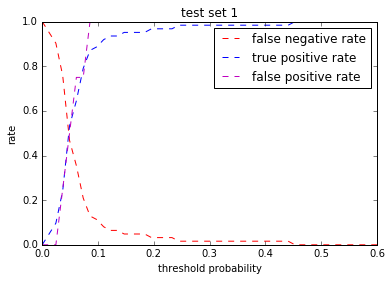

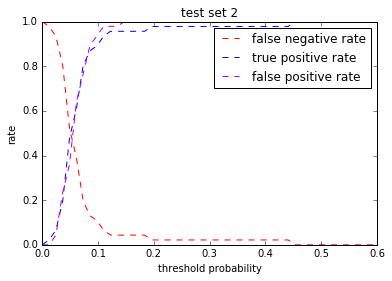

In [131]:
plot_rates(y_test_1, x_test_1, 'test set 1')
plot_rates(y_test_2, x_test_2, 'test set 2')

**Under what general conditions does  C2  perform better than  C1 ? Support your conclusion with a mathematical proof or simulation***

The Bayes classifier (at a threshold of 0.5) will minimise the overall classification error rate but only when the dataset has an even split between the different classes and there is good separation between features.

If there is an unequal representation of the classes in the training/testing set, the Bayes classifier will be a poor indicator. For example, within a group of people of the same class, the Bayes classifier will always predict one class. 

The position of the threshold should be varied depending on the distribution of groups in the training set. 

In this case, the intersection of the false positive, true positive and false negative rates occurs at a threshold probability of 0.05. 